# Big Data Mart Sales Problem



## Importing Libraries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Importing dataset

As according to the question statement there are two datasets available in problem statement and they are: 1.train 2.test. So, first import train data set and than import test dataset.


### 1. Train Dataset

Importing train dataset as df1

In [2]:
#Import the dataset

df1= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Importing the dataset and analyze all the columns 

## Shape of data with number of rows and columns of df1(train dataset)


In [3]:
df1.shape

(8523, 12)

There are 8523 rows and 12 columns in dataset

## Detailed Description of df1

In [4]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can see detailed description of all rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile values.

## Datatypes of all columns in df1

In [5]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having float datatype: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales.

and rest is integer data type : Outlet_Establishment_Year

Item_Outlet_Sales is a target variable.

## Checking for null values in df1

In [6]:
#checking for is there any null values present in the train dataset 

df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are two columns which are having missing data in it.

- Item_Weight : 1463 rows are missing
- Outlet_Size : 2410 rows are missing

<AxesSubplot:>

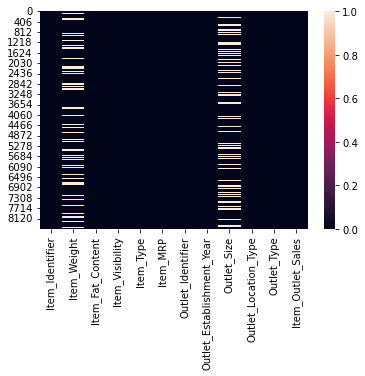

In [7]:
#To check missing values
sns.heatmap(df1.isnull())

As we see there are two columns are having missing values in it.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)

Uni variate analysis works with only one variable, hence it is called as uni variate.

### 1. Distplot

In [8]:
#list out columns which is having float or integer datatypes
features = df1[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]]

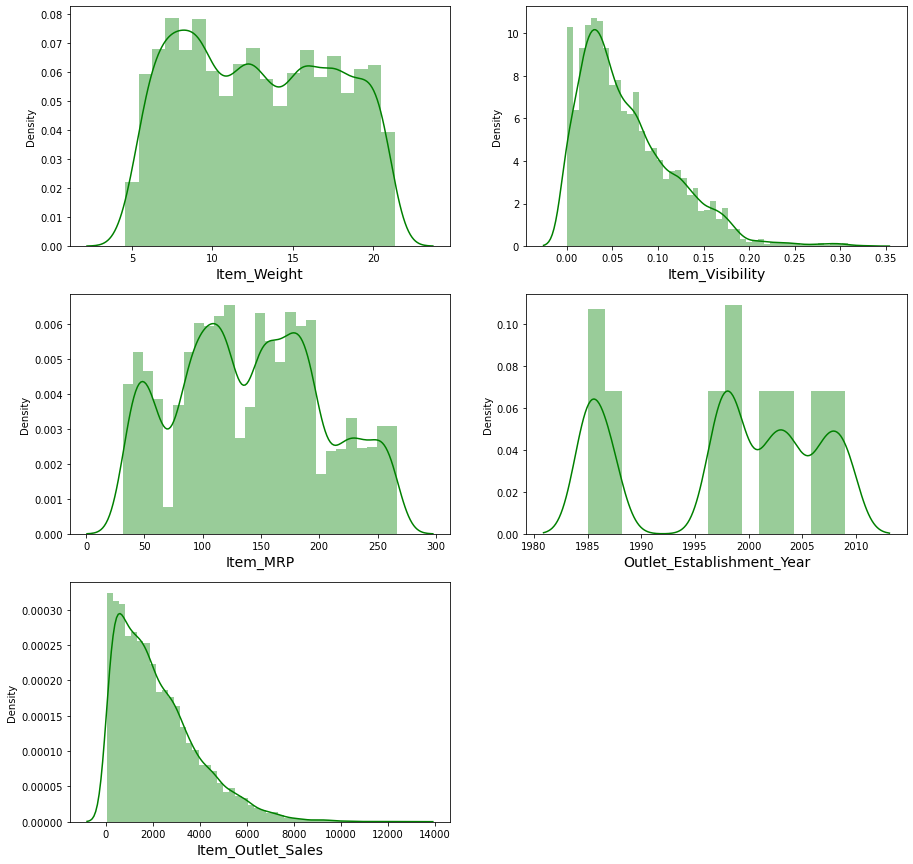

In [9]:
#Relationship Visualizing

plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 6: # as we see there are five columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(features[column], color = 'g')
        plt.xlabel(column,fontsize=14)
        
    plotnumber += 1
plt.show()

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weight and Item_MRP. 
Item_Visibility is having skewness in it.

Outlet_Establishment_Year is a catogorical variable(integer) so no need to find skewness in it and Item_Outlet_Sales is a target variable.

### 2. Histplot

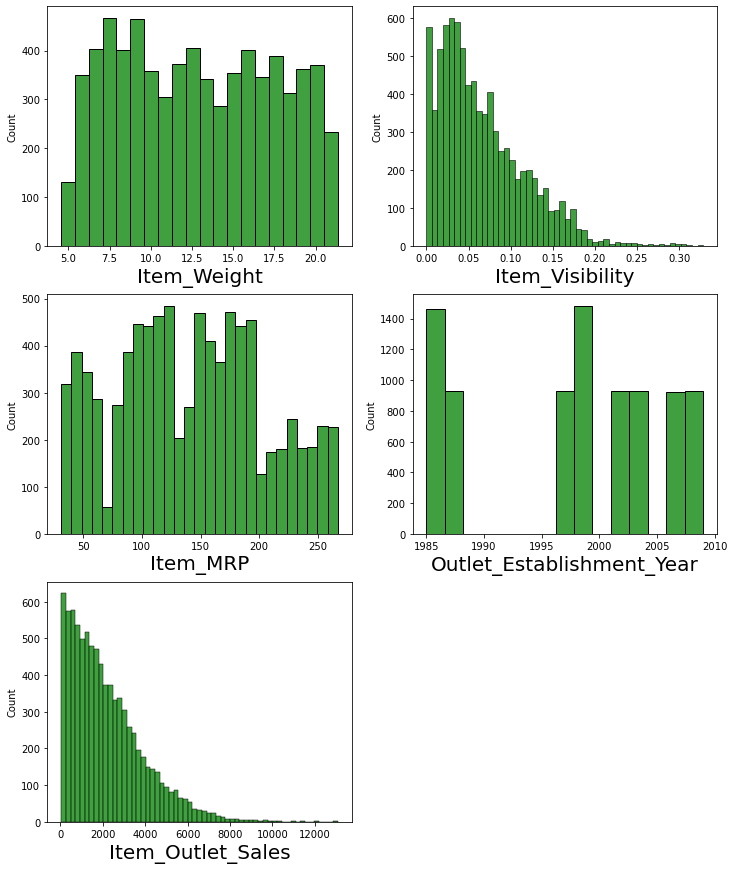

In [10]:
#Relationship Visualizing

plt.figure(figsize = (12,15), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 6: # as we see there are five columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(features[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in the plot the counts of a particular columns have been given in the plot.

### 3. Boxplot

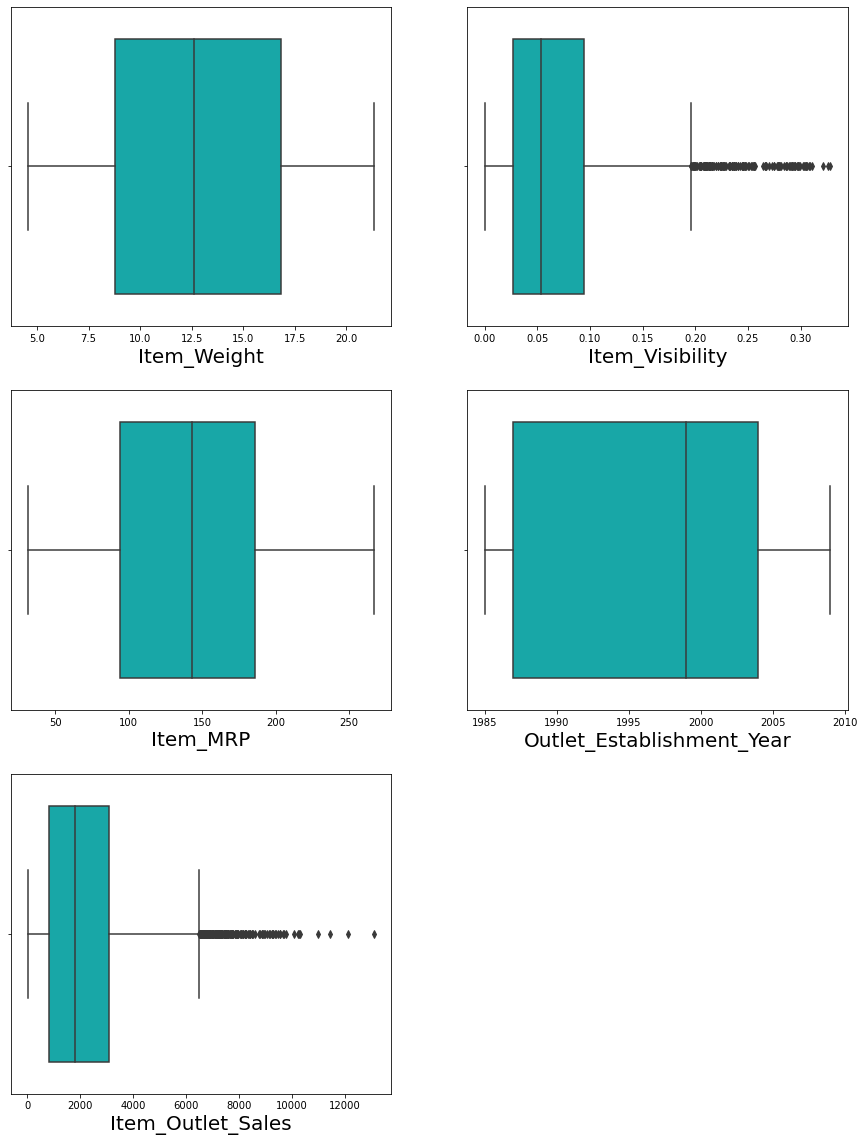

In [11]:
#Relationship Visualizing

plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 6: # as we see there are five columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(features[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we have seen in boxplot Item_Visibility is having outliers in it. So need to remove that.


### 4. Countplot

In [12]:
features_object = df1[["Item_Identifier", "Item_Fat_Content", "Outlet_Identifier", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", ]]

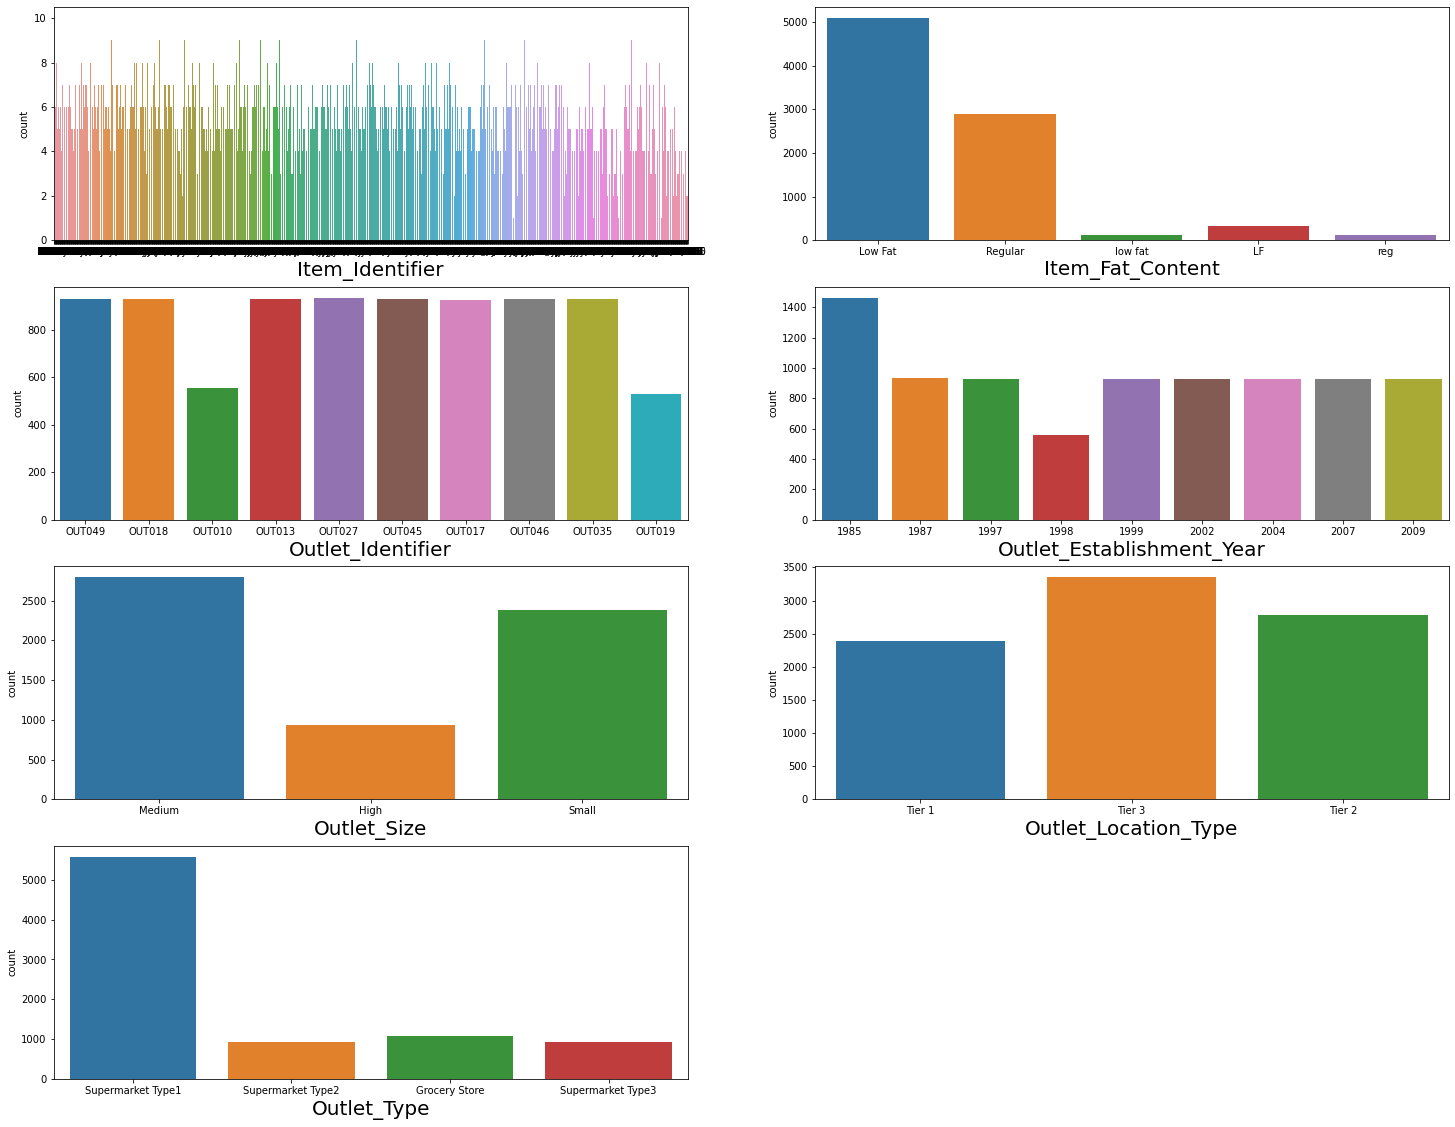

In [13]:
#Relationship Visualizing

plt.figure(figsize = (25,30))
plotnumber = 1

for column in features_object:
    if plotnumber <= 8: # as we see there are seven columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(features_object[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in the plot we can see the counts of object columns.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

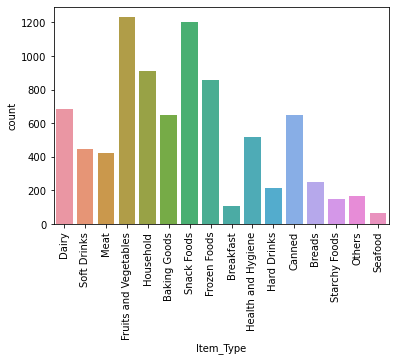

In [14]:
l = list(df1['Item_Type'].unique())
chart = sns.countplot(df1["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

### Bi variate analysis

Bi variate analysis is works with two variables.

### Scatterplot

In [15]:
df_bi=df1.drop(['Outlet_Location_Type'], axis=1)
df_bi=df1.drop(['Outlet_Type'], axis=1)
df_bi=df1.drop(['Outlet_Size'], axis=1)

It is not possible in scatterplot to every variable relationship with target variable as it is not in proper form, so drop that column only for bivariate visualization.

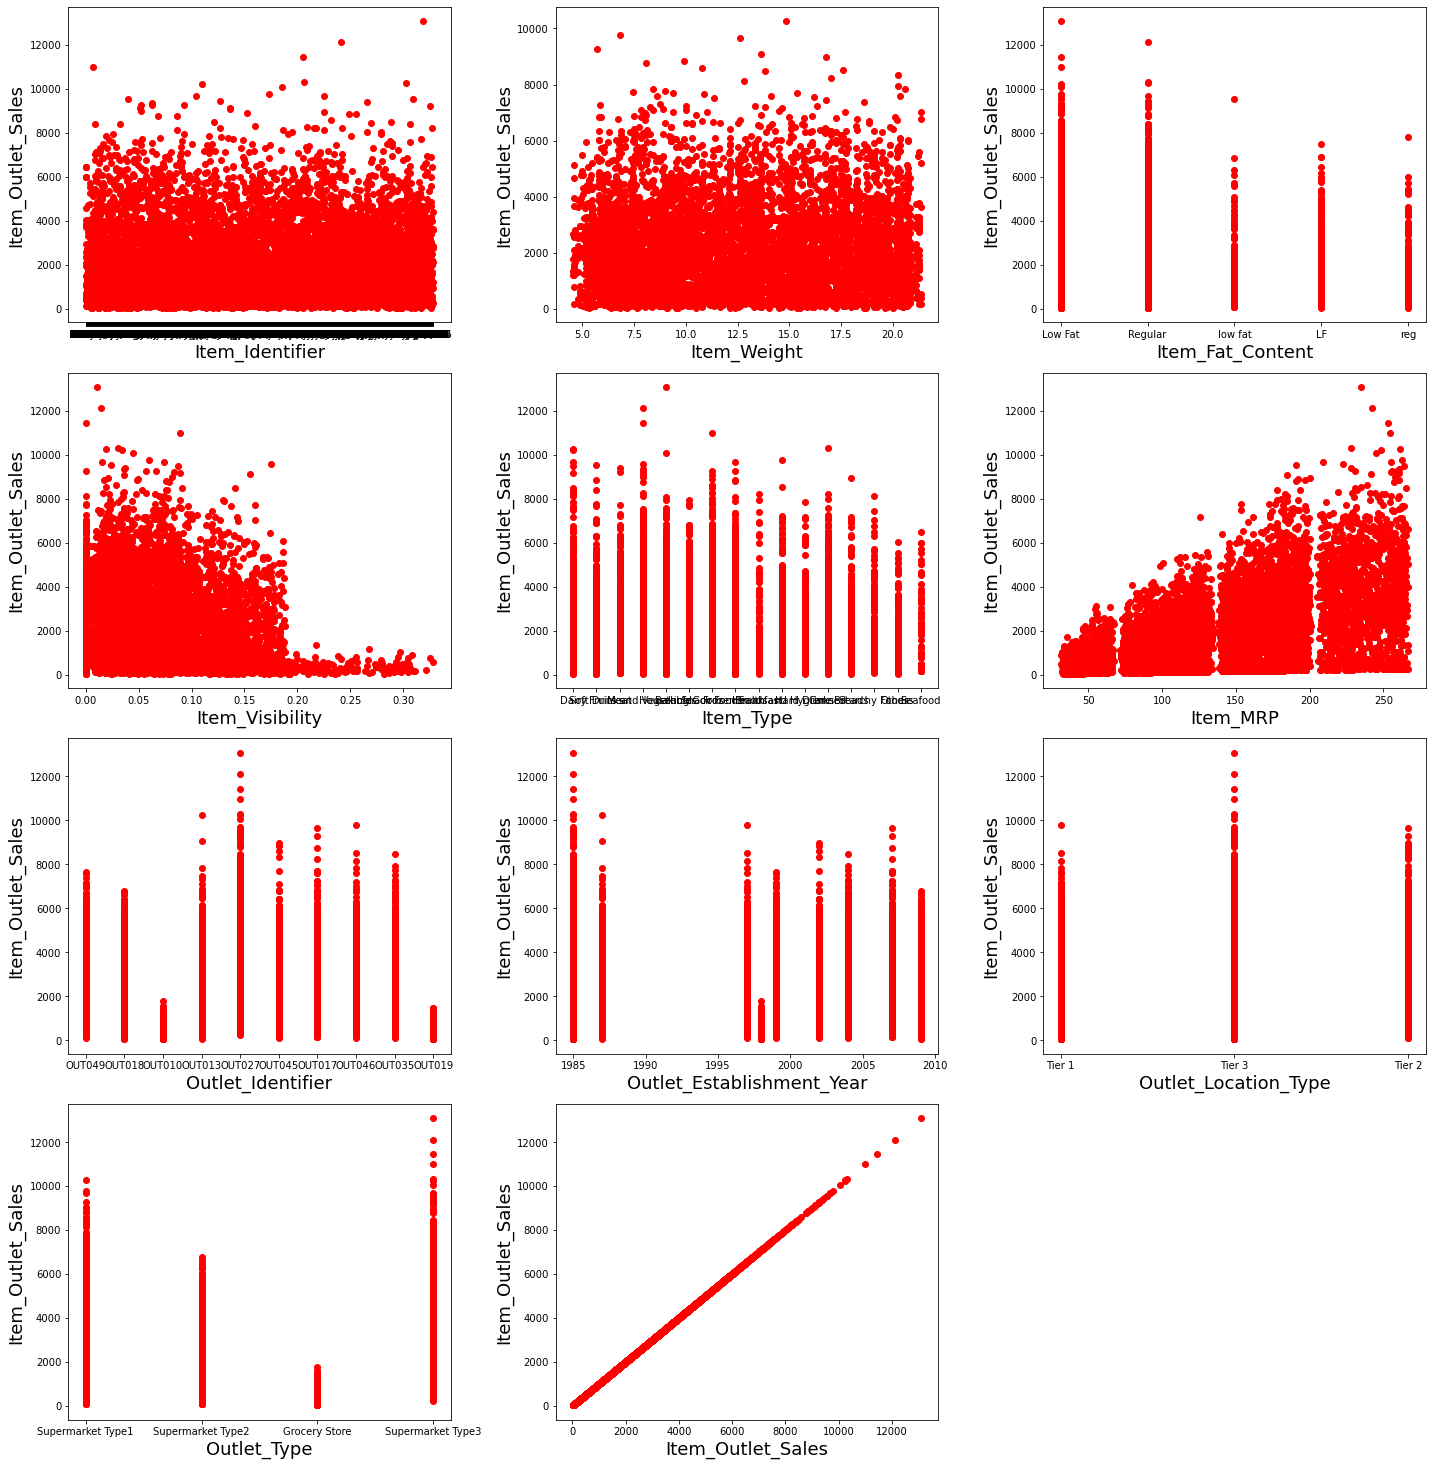

In [16]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df_bi:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df_bi[column],df_bi['Item_Outlet_Sales'], color='r')
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Item_Outlet_Sales', fontsize=18)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot some columns are having linear relationship with target variable and other variables are having non linear realationship with target variable and outliers are also present in some columns.

### Multi Variate analysis

Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

In [17]:
#check correlation
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Let's create a heatmap to visualize the data better.

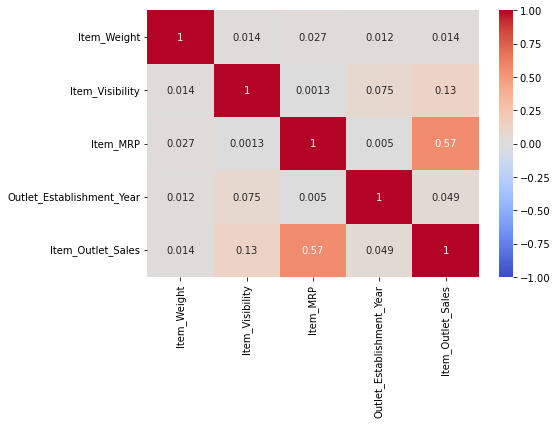

In [18]:
df1_cor = df1.corr().abs()

plt.figure(figsize = (8,6))
sns.heatmap(df1_cor, vmin=-1, vmax= 1, annot=True, cmap="coolwarm")
plt.tight_layout()

As shown in heatmap Item_Outlet_Sales and Item_MRP are strongly correlated with each other and Item_weight column is weekly correlate with targate variable.

#### Find out which columns are positively and negatively correlated with each other


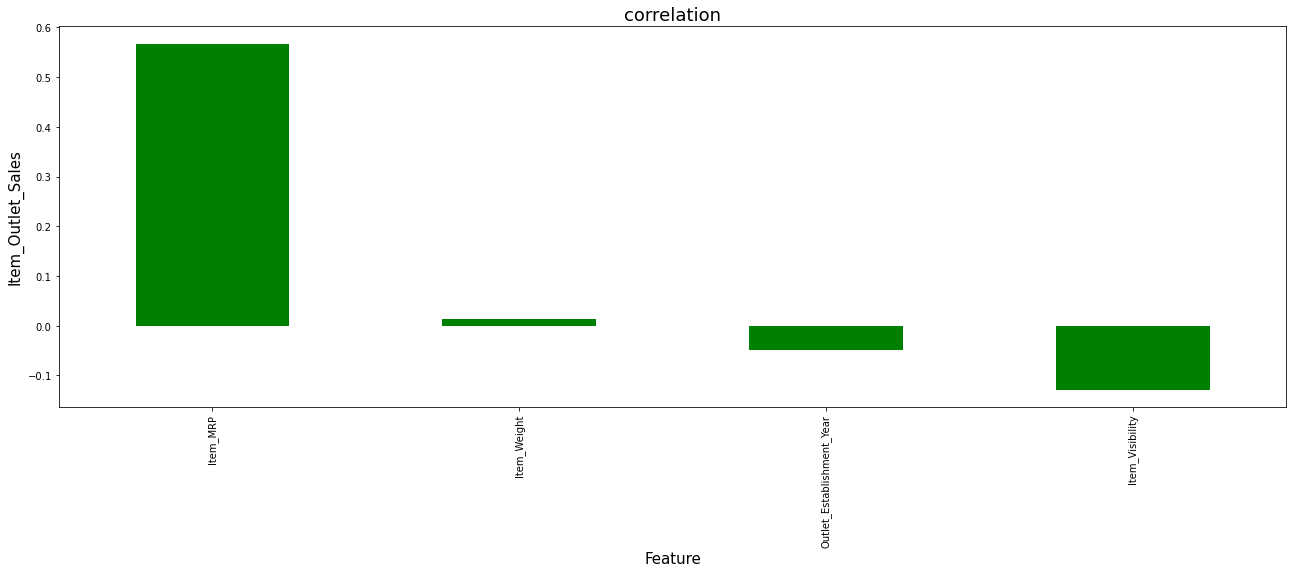

In [19]:
plt.figure(figsize=(22,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

Item_weight column is weekly correlate with targate variable.



After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:

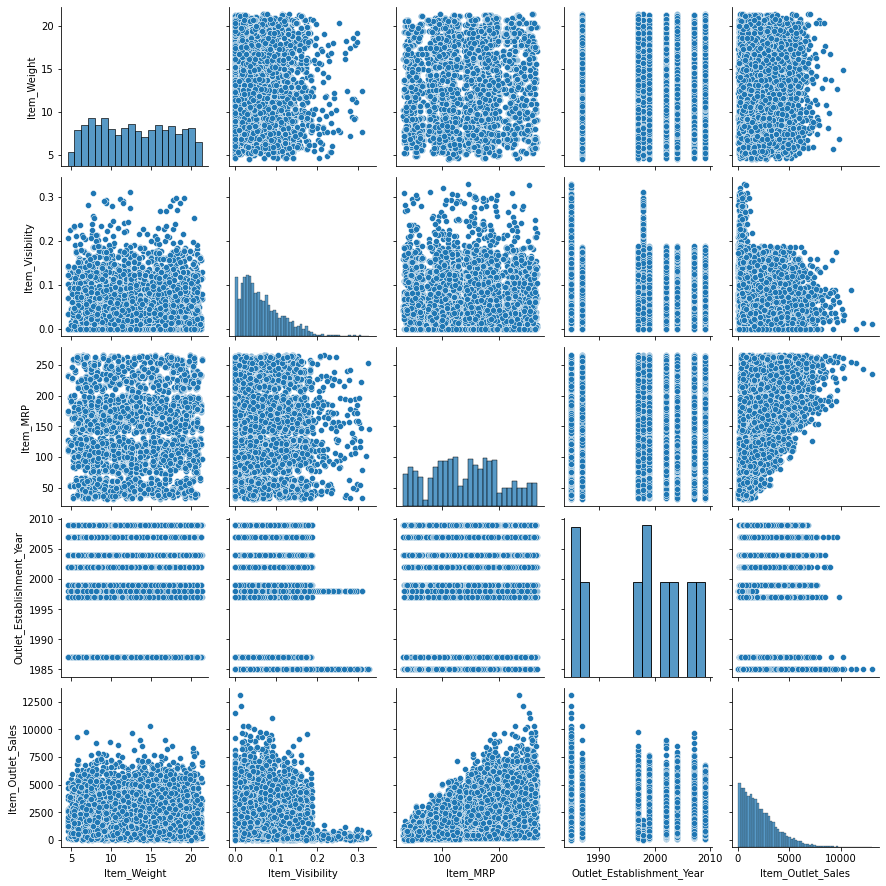

In [20]:
sns.pairplot(df1)

## Encoding

### 1. Item_Identifier

In [21]:
df1['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [22]:
df1['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

As we have seen, the Item_Identifier is having unique values. So we can drop this column.

In [23]:
#drop Item_Identifier colum
df1.drop(['Item_Identifier'], axis=1, inplace=True)

### 2. Item_Fat_Content

In [24]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.

and reg is nothing but Regular. So, we can combine that and make 2 unique values in Item_Fat_Content column.

In [26]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')

In [27]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
#encoding with label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df1['Item_Fat_Content'] = lb.fit_transform(df1['Item_Fat_Content'].astype(object))

In [29]:
#after encoding check unique values of 'Item_Fat_Content' column
df1['Item_Fat_Content'].unique()

array([0, 1])

In [30]:
#after encoding value caounts of 'Item_Fat_Content' column
df1['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

### 3. Item_Type


In [31]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [32]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [33]:
#encoding with label encoder
lb = LabelEncoder()
df1['Item_Type'] = lb.fit_transform(df1['Item_Type'].astype(object))

In [34]:
#after encoding check unique values of 'Item_Type' column
df1['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [35]:
#after encoding value caounts of 'Item_Type' column
df1['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

### 4. Outlet_Identifier


In [36]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [37]:
df1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

As we have seen, the Outlet_Identifier is having unique values. So we can drop this column.

In [38]:
df1.drop(['Outlet_Identifier'], axis=1, inplace=True)

### 5. Outlet_Size

In [39]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [40]:
df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [41]:
#using SimpleImputer we can add mode values to the missing values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = "most_frequent")
df1['Outlet_Size']=imp.fit_transform(df1['Outlet_Size'].values.reshape(-1,1))

In [42]:
#check null values 
df1.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
#encoding with label encoder
lb = LabelEncoder()
df1['Outlet_Size'] = lb.fit_transform(df1['Outlet_Size'].astype(object)).reshape(-1,1)

In [44]:
#after encoding value caounts of 'Outlet_Size' column
df1['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

### 6. Outlet_Location_Type

In [45]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [46]:
df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [47]:
#encoding usinf label encoder
le = LabelEncoder()
df1["Outlet_Location_Type"] = le.fit_transform(df1["Outlet_Location_Type"])

In [48]:
#checking unique values after encoding
df1['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [49]:
#checking value counts after encoding
df1['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

### 7. Outlet_Type

In [50]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [51]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [52]:
#encoding using label encoder
le = LabelEncoder()
df1["Outlet_Type"] = le.fit_transform(df1["Outlet_Type"])

In [53]:
#checking value counts after encoding
df1['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

### 8. Handling missing values in 'Item_Weight' column

In [54]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [55]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


## Remove Outliers

As we see outliers present in newpaper column. So, first remove outliers.

### 1. Outlier removal using Zscore


In [56]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df1[['Item_Weight','Item_Visibility','Item_MRP']]) #all contineous column only
abs_z_score = np.abs(z_score)
        
data = (abs_z_score < 3).all(axis = 1)

new_df1 = df1[data]

print("shape before :", df1.shape)
print("shape after :", new_df1.shape)
print("Percentage Loss :", (df1.shape[0]-new_df1.shape[0])/df1.shape[0])

shape before : (8523, 10)
shape after : (8428, 10)
Percentage Loss : 0.011146309984747155


1.114% data loss after using zscore technique

98.886% data remains

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

### Visualize data again to check outliers are present at low side or high side


In [57]:
data = df1

In [58]:
#features in which outliers are detected
fe = data[['Item_Weight','Item_Visibility','Item_MRP']]

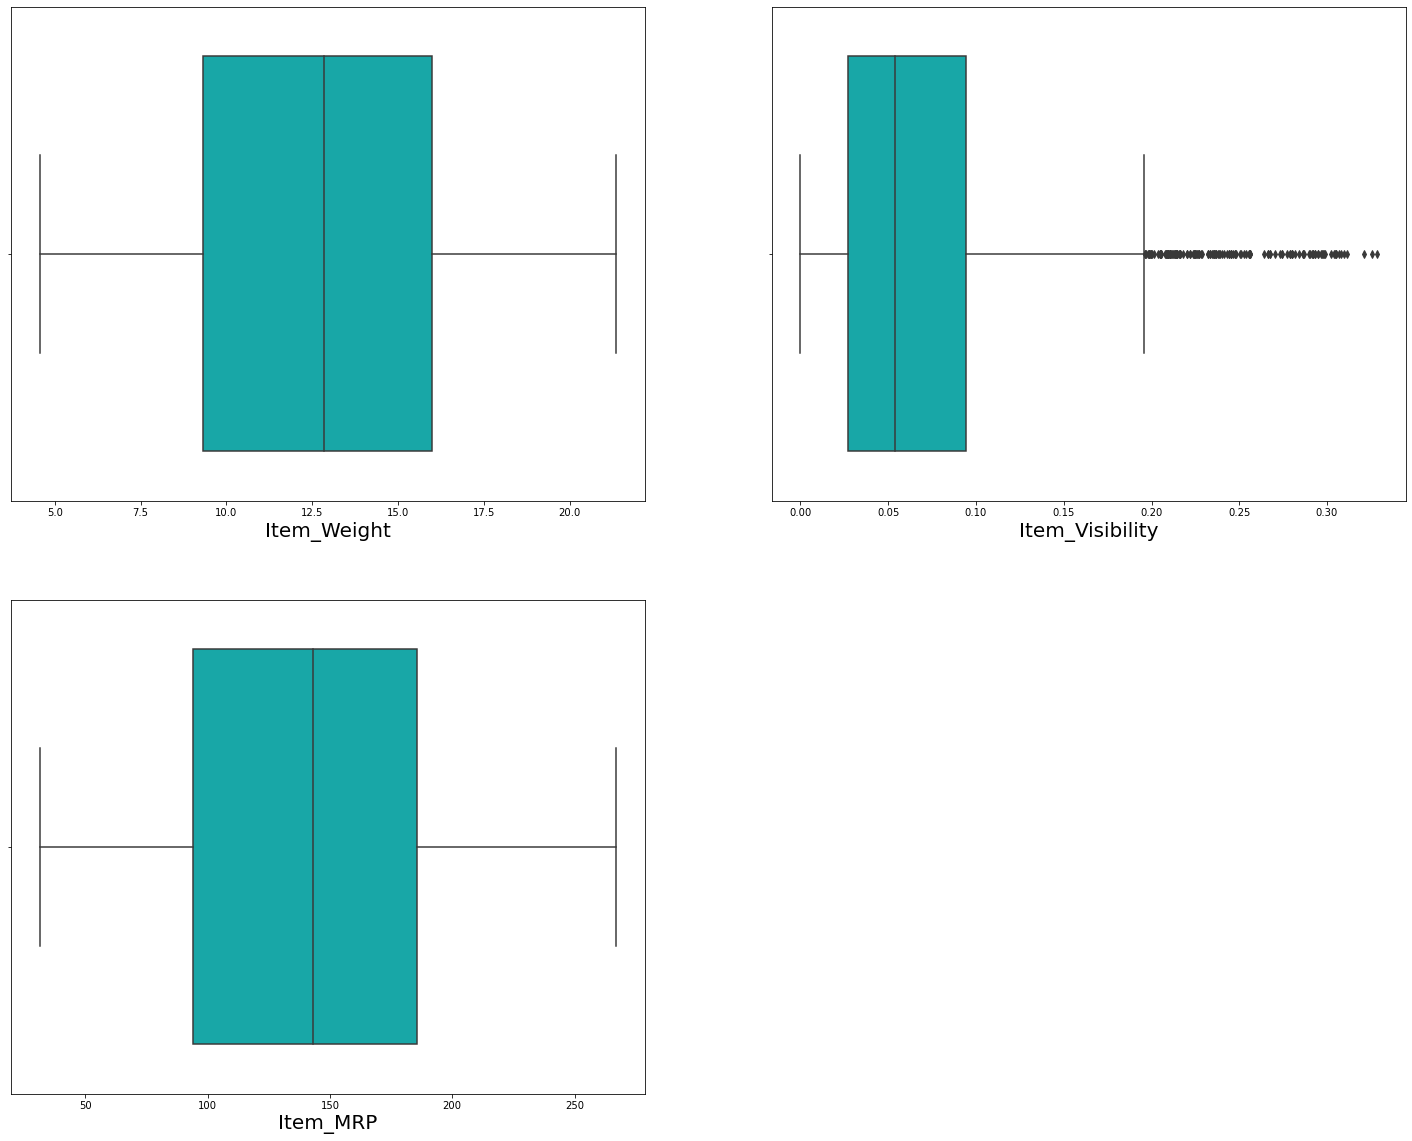

In [59]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 4:
        ax = plt.subplot(2,2, graph)
        sns.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()


As shown in plot outliers is present only in Item_Visibility column, so remove it first.

In [60]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data.quantile(0.25)

#3rd quantile 75%
q3 = data.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [61]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


### Outlier detection formula

- Higher side ==> Q3 + (1.5 * IQR)
- Lower side ==> Q1 - (1.5 * IQR)

Outliers removal from higher side

In [62]:
#as shown in boxplot we have outlier in higher side of Item_Visibility 
#Remove outliers from higher side so, use higher side formula

visi_high = (q3.Item_Visibility + (1.5*(iqr.Item_Visibility)))
visi_high

0.195979015

In [63]:
index_out = np.where(data['Item_Visibility'] > visi_high)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8374,8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8375,8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8376,8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8377,8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


after removing outliers from Item_Visibility 8379 rows will remain in dataframe.

#### After removing outliers using IQR technique there are 8379 rows will remain in dataset.

Now, find how much data loss in IQR method

In [64]:
((8523-8379)/8523)*100

1.689545934530095

1.68% data loss in IQR method

98.32% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers, we conclude that from both the methods only 1% data will be lost so we can use any of these methods to remove the outliers.

## Check the skewness and remove that


In [65]:
new_df1.skew()

Item_Weight                  0.089907
Item_Fat_Content             0.620786
Item_Visibility              0.795956
Item_Type                    0.100953
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Outlet_Size                 -0.082879
Outlet_Location_Type        -0.213304
Outlet_Type                  0.947057
Item_Outlet_Sales            1.173070
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Item_Weight, Item_Visibility and Item_MRP in which only Item_Visibility column have skewness in it. So, we need to remove skewness from Item_Visibility only.

and maximum columns contains categorical values. so no need to remove skewness from that.

#### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.


In [66]:
new_df1.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## Apply Power transformation to remove skewness


In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data.

In [67]:
#applying log transformation on skewed columns

new_df1['Item_Visibility'] = new_df1['Item_Visibility'].replace(0,new_df1['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

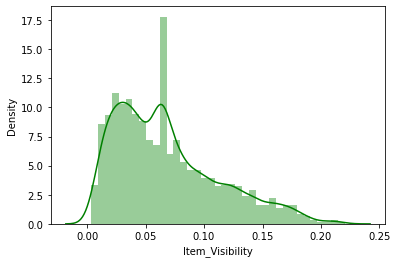

In [68]:
sns.distplot(new_df1['Item_Visibility'], color='g')


As shown in plot less skewness present after using power transformation skewness removal technique.

## Now work on data set 2


### 2. Test Dataset


In [69]:
#Imported train dataset as a df1

#Importing test dataset as df2

df2= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


### Shape of data with number of rows and columns of df2 (test dataset)


In [70]:
df2.shape

(5681, 11)

There are 5681 Rows and 11 Columns in test dataset

### Detailed description df2


In [71]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


We can see detailed description of all rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile values.

### Datatypes of all columns in df2


In [72]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having floting datatype: Item_Weight, Item_Visibility, Item_MRP.

and rest is integer data type : Outlet_Establishment_Year

### Checking for null value in test dataset df2


In [73]:
#check is there any null value present in any column

df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are two columns are having missing data in it.

- Item_Weight : 976 rows are missing
- Outlet_Size : 1606 rows are missing

# EDA (Exploratory Data Analysis)


### Visualization (Uni Variate analysis)


Uni variate analysis works with only one variable, hence it is called uni variate.


## 1. Distplot


In [74]:
features = df2[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]]


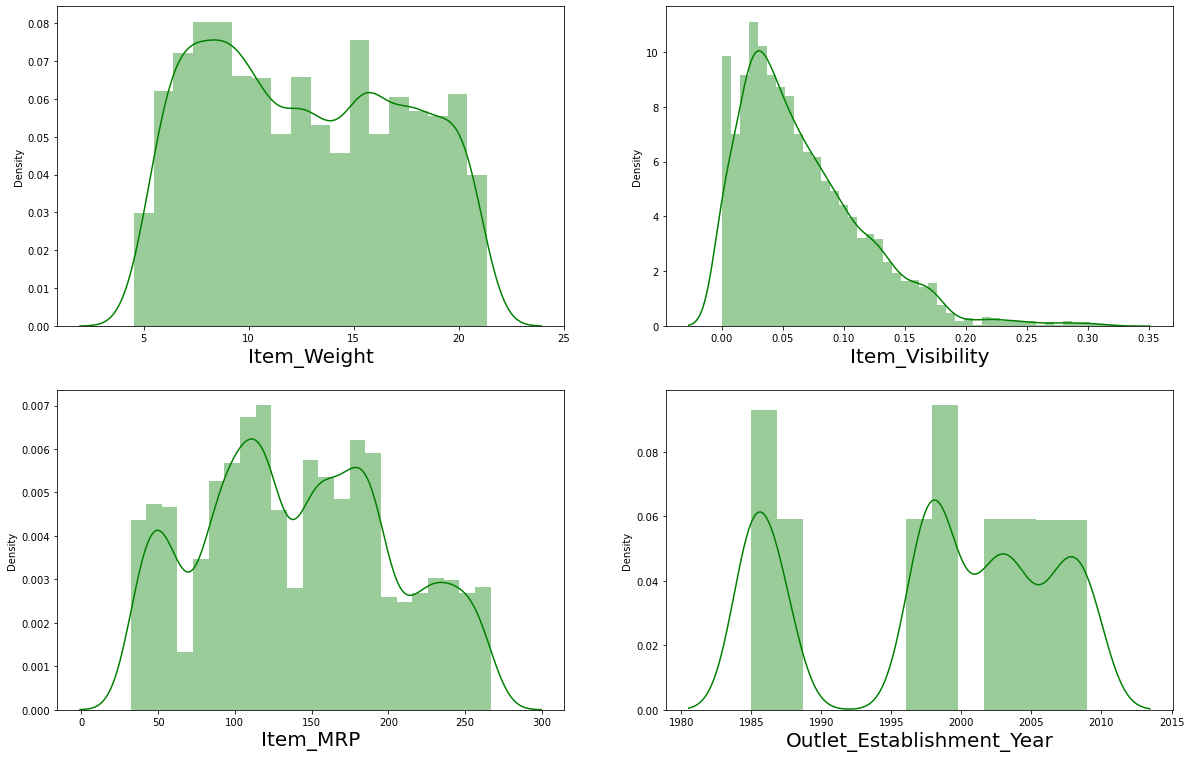

In [75]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(features[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weightand Item_MRP.  Item_Visibility is having skewness in it.

Outlet_Establishment_Year is a catogorical variable so need to find skewness in it.

## 2. Boxplot


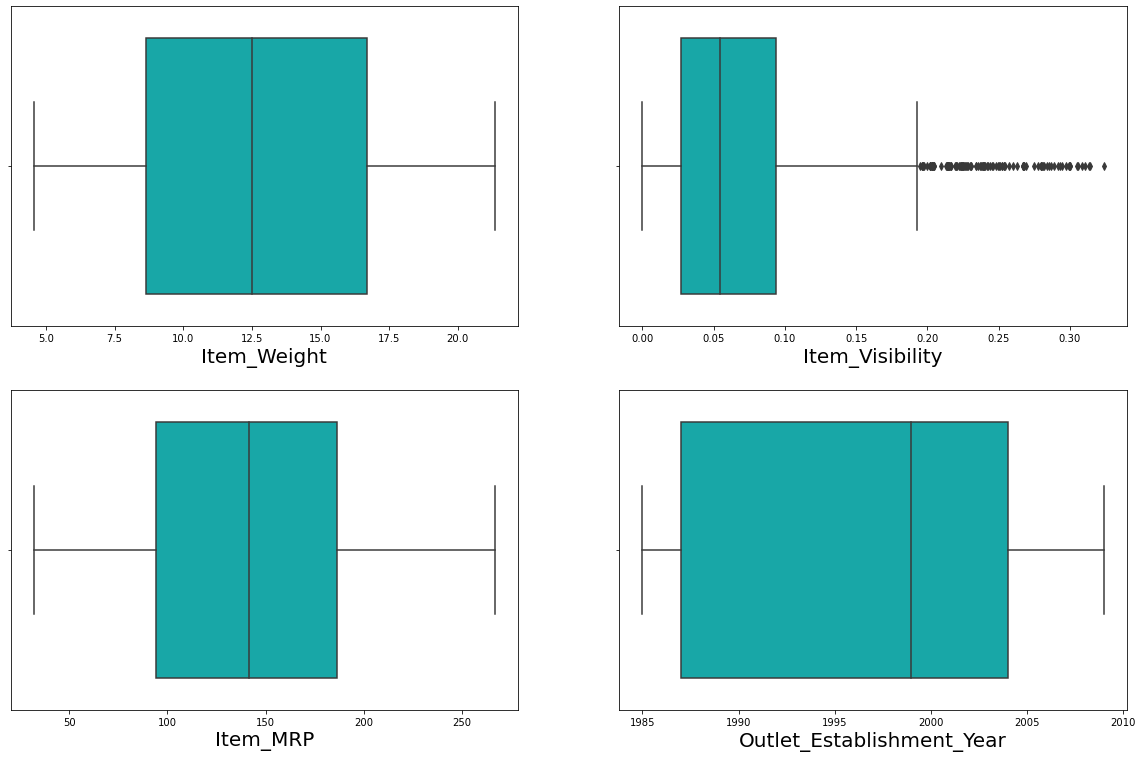

In [76]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(features[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we have seen in boxplot Item_Visibility is having outliers in it.


## 3. Histplot


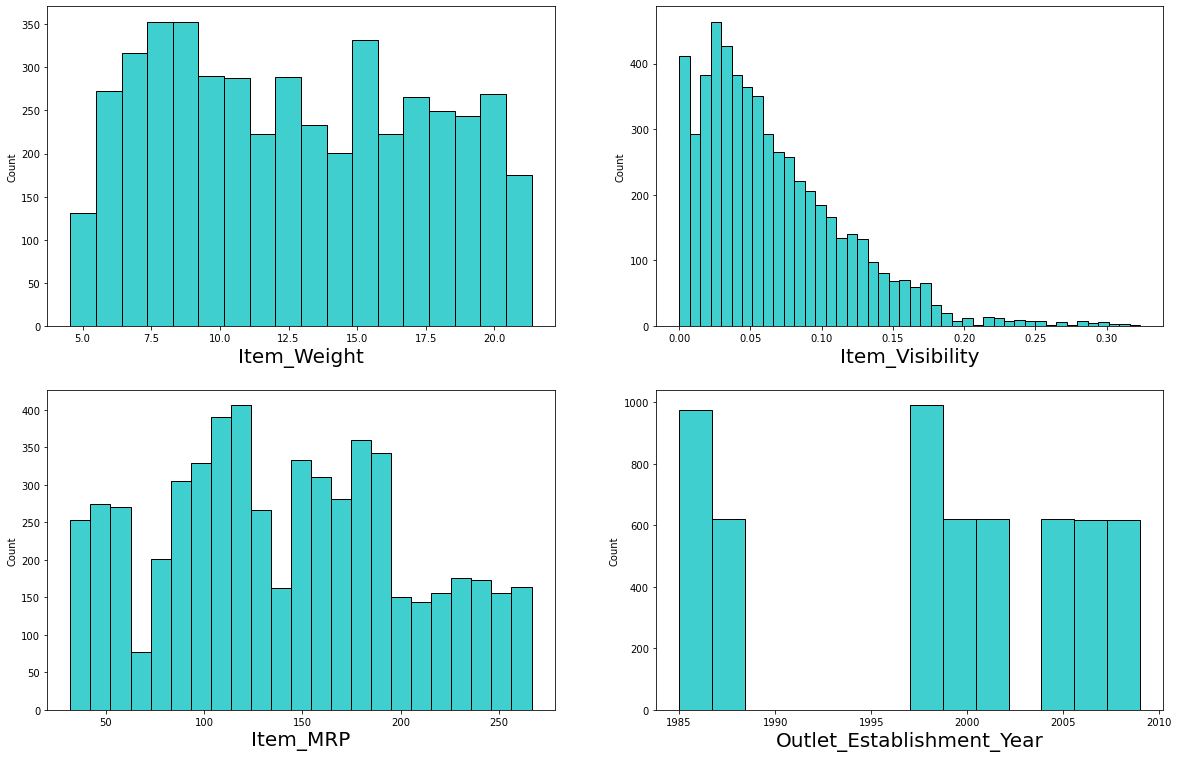

In [77]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(features[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

### Multi Variate analysis


Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity


In [78]:
df2.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


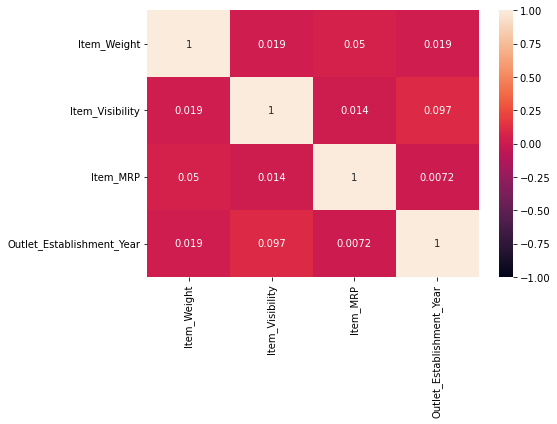

In [79]:
df2_cor = df2.corr().abs()

plt.figure(figsize = (8,6))
sns.heatmap(df2_cor, vmin=-1, vmax= 1, annot=True)
plt.tight_layout()

As shown in heatmap Item_Visibility and Outlet_Establishment_Year are strongly correlated with each other and Outlet_Establishment_Year column is weekly correlate with Item_MRP.



#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:


In [80]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Encoding/Handling missing values

### 1. Item_Identifier

In [81]:
df2['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [82]:
df2['Item_Identifier'].value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

As we have seen the Item_Identifier unique values, so we can drop this column.

In [83]:
#drop Item_Identifier colum
df2.drop(['Item_Identifier'], axis=1, inplace=True)

### 2. Item_Fat_Content

In [84]:
df2['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [85]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.

and reg is nothing but Regular. So, we can club that and make 2 unique values in Item_Fat_Content column.

In [86]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [87]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [88]:
#encoding with label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df2['Item_Fat_Content'] = lb.fit_transform(df2['Item_Fat_Content'].astype(object))

In [89]:
#checking for value counts after encoding
df2['Item_Fat_Content'].value_counts()

0    3668
1    2013
Name: Item_Fat_Content, dtype: int64

### 3. Item_Type

In [90]:
df2['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [91]:
df2['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [92]:
#encoding
le = LabelEncoder()
df2["Item_Type"] = le.fit_transform(df2["Item_Type"])

In [93]:
#after encoding checking for value counts
df2["Item_Type"].value_counts()

13    789
6     781
9     638
5     570
4     454
0     438
3     435
8     338
10    311
14    281
1     165
7     148
15    121
11    111
2      76
12     25
Name: Item_Type, dtype: int64

### 4. Outlet_Identifier

In [94]:
df2['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [95]:
df2['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

'Outlet_Identifier' column has unique values. So, we can drop it.

In [96]:
#drop Outlet_Type colum as its just an identifier
df2.drop(['Outlet_Identifier'], axis=1, inplace=True)

### 5. Outlet_Size

In [97]:
df2['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [98]:
df2['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [99]:
#fill the missing values with mode value.
df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

In [100]:
#encoding
le = LabelEncoder()
df2["Outlet_Size"] = le.fit_transform(df2["Outlet_Size"].values.reshape(-1,1))


In [101]:
#checking for value_counts after encoding
df2['Outlet_Size'].value_counts()


1    3468
2    1592
0     621
Name: Outlet_Size, dtype: int64

### 6. Outlet_Location_Type

In [102]:
df2['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [103]:
df2['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [104]:
#encoding
le = LabelEncoder()
df2["Outlet_Location_Type"] = le.fit_transform(df2["Outlet_Location_Type"])

In [105]:
#checking for value counts after encoding
df2['Outlet_Location_Type'].value_counts()

2    2233
1    1856
0    1592
Name: Outlet_Location_Type, dtype: int64

### 7. Outlet_Type

In [106]:
df2['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [107]:
df2['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [108]:
#encoding
le = LabelEncoder()
df2["Outlet_Type"] = le.fit_transform(df2["Outlet_Type"])

In [109]:
#checking for value counts after encoding
df2['Outlet_Type'].value_counts()

1    3717
0     722
3     624
2     618
Name: Outlet_Type, dtype: int64

### 8. Handle missing values of Item_Weight

In [110]:
df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].mean())

In [111]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,1,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,1,0.000000,3,214.6218,2007,1,1,1


## Remove outliers


### 1.Outlier removal using Zscore


In [112]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df2[['Item_Weight','Item_Visibility','Item_MRP']]) #all contineous column only
abs_z_score = np.abs(z_score)
        
data = (abs_z_score < 3).all(axis = 1)

new_df2 = df2[data]

print("shape before :", df2.shape)
print("shape after :", new_df2.shape)
print("Percentage Loss :", (df2.shape[0]-new_df2.shape[0])/df2.shape[0])

shape before : (5681, 9)
shape after : (5600, 9)
Percentage Loss : 0.01425805315965499


1.42% data loss after using Zscore technique.

98.58% data remains.

In [113]:
new_df2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,12.701017,0.352857,0.062899,7.240714,141.126934,1997.926250,1.165714,1.115357,1.218750
std,4.261717,0.477901,0.045919,4.223010,61.771211,8.356738,0.600086,0.809556,0.789174
min,4.555000,0.000000,0.000000,0.000000,31.990000,1985.000000,0.000000,0.000000,0.000000
25%,9.195000,0.000000,0.026848,4.000000,94.446200,1987.000000,1.000000,0.000000,1.000000
50%,12.695633,0.000000,0.053348,6.000000,141.531200,1999.000000,1.000000,1.000000,1.000000
75%,15.850000,1.000000,0.091380,10.000000,186.098350,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.216763,15.000000,266.588400,2009.000000,2.000000,2.000000,3.000000


### 2. Outlier Removing using IQR
#### from boxplot in EDA, we came to know that outliers present in following columns.
Visualize data again to check outliers are present at low side or high side

In [114]:
data1 = df2

In [115]:
#features in which are contineous in nature
fe = data1[['Item_Weight','Item_Visibility','Item_MRP']]

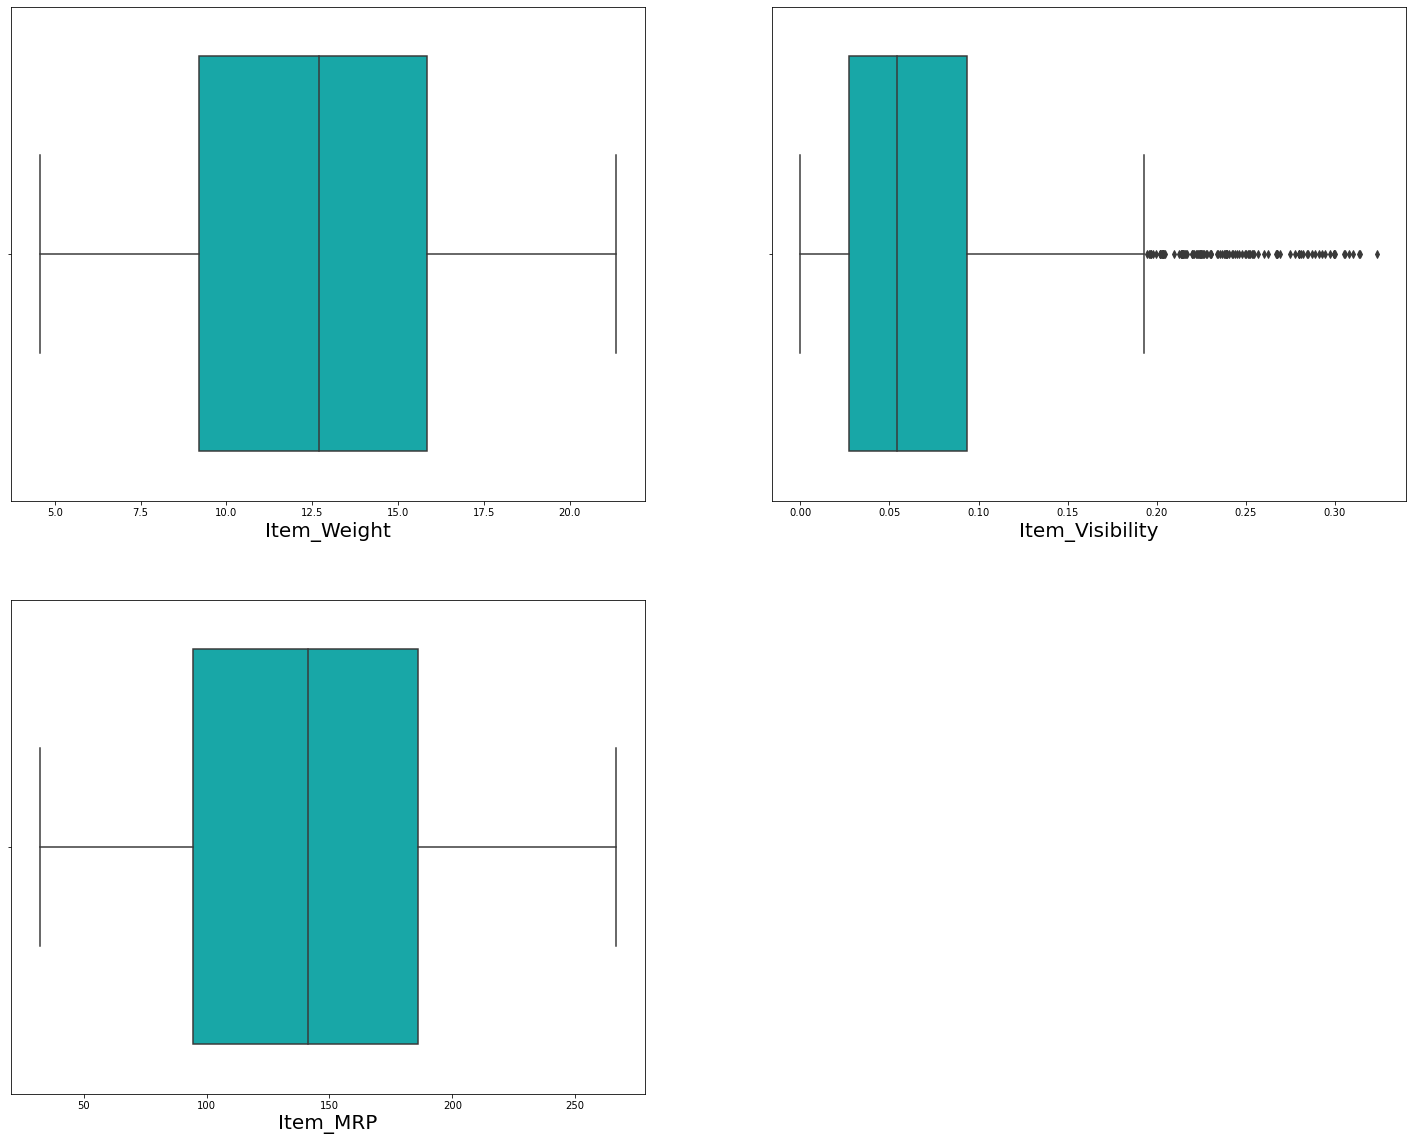

In [116]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(2,2, graph)
        sns.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

only Item_visibility contains outliers in contineous data.

In [117]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data1.quantile(0.25)

#3rd quantile 75%
q3 = data1.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [118]:
data1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.354339,0.065684,7.233410,141.023273,1997.828903,1.170921,1.112832,1.201373
std,4.245189,0.478355,0.051252,4.219057,61.809091,8.372256,0.600328,0.812824,0.796740
min,4.555000,0.000000,0.000000,0.000000,31.990000,1985.000000,0.000000,0.000000,0.000000
25%,9.195000,0.000000,0.027047,4.000000,94.412000,1987.000000,1.000000,0.000000,1.000000
50%,12.695633,0.000000,0.054154,6.000000,141.415400,1999.000000,1.000000,1.000000,1.000000
75%,15.850000,1.000000,0.093463,10.000000,186.026600,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.323637,15.000000,266.588400,2009.000000,2.000000,2.000000,3.000000


### Outlier detection formula
#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)
Outliers removal from higher side

In [119]:
#as shown in boxplot we have outlier in higher side of Item_Visibility 
#Remove outliers from higher side so, use higher side formula

visible_ = (q3.Item_Visibility + (1.5*(iqr.Item_Visibility)))
visible_

0.193086245

In [120]:
index_out = np.where(data1['Item_Visibility'] > visible_)
data1 = data1.drop(data1.index[index_out])
data1.shape
data1.reset_index()

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,4,12.695633,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5563,5676,10.500000,1,0.013496,13,141.3154,1997,2,0,1
5564,5677,7.600000,1,0.142991,15,169.1448,2009,1,2,2
5565,5678,10.000000,0,0.073529,8,118.7440,2002,1,1,1
5566,5679,15.300000,1,0.000000,3,214.6218,2007,1,1,1


after removing outliers from Item_Visibility 5568 rows will remains in dataframe.

In [121]:
#Percentage loss
((5681-5568)/5681)*100

1.9890864284456962

1.98% data loss after using IQR technique

98.02% data remains after using IQR technique.

##### After applying Zscore and IQR technique to remove outliers. We conclude that same amount data will loss in Zscore technique and IQR yechnique . so we will any of tham


### Check the skewness and remove that


In [122]:
new_df2.skew()

Item_Weight                  0.140901
Item_Fat_Content             0.616007
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Item_Weight, Item_Visibility and Item_MRP in which only Item_Visibility column is contineous in nature and has skewness in it. So, we need to remove skewness from Item_Visibility only.

and maximum columns contains categorical values. so no need to remove skewness contineous column.

#### Check columns datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.


In [123]:
new_df2.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

### Apply Power transformation to remove skewness


In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [124]:
#applying power transformation on skewed columns

new_df2['Item_Visibility'] = new_df2['Item_Visibility'].replace(0,new_df2['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

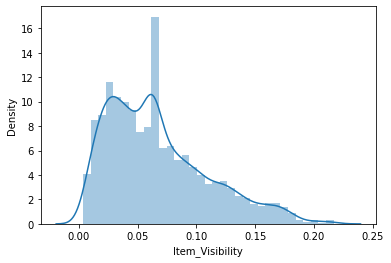

In [125]:
sns.distplot(new_df2['Item_Visibility'])


As shown in plot less skewness present after using power transformation skewness removal technique.

## Seperating the columns into featuers and target:

### X=Features, Y=Target

In [126]:
x = new_df1.drop(columns = 'Item_Outlet_Sales', axis=1)
y = new_df1['Item_Outlet_Sales']

### Scalling technique


In [127]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

using standard scaler technique variables are scaled now.

## Variance inflation factor


In [128]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.001981,Item_Weight
1,1.022923,Item_Fat_Content
2,1.033226,Item_Visibility
3,1.022868,Item_Type
4,1.001783,Item_MRP
5,1.071717,Outlet_Establishment_Year
6,1.702975,Outlet_Size
7,2.041749,Outlet_Location_Type
8,1.366157,Outlet_Type


as we have seen in the table vif value is not greater than 5 for any columns, so no need to drop columns.

## Finding best random state


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [131]:
from sklearn.tree import DecisionTreeRegressor
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_val_test, y_train, y_val_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_val_test)
    acc=r2_score(y_val_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.26841776101260306 on Random_state  170


In [132]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x,y, test_size=.30, random_state=170)

## 1.Linear Regression Model


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr =LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [135]:
# Make predictions on the training and validation sets
y_train_pred = lr.predict(x_train)
y_val_pred = lr.predict(x_val_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_val_test, y_val_pred))

0.5111160625290119
0.49170997741377664


### Cross Validation of Linear Regression


In [136]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(lr, x, y, cv=5)
cv_mean1=cv_score.mean()
cv_mean1

0.5031541945412308

The r2 score for trained linear regression model is : 51.11%

The r2 score for validated linear regression model is : 49.17%

Cross validation score for linear regression is : 50.31%

### Regularization

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [138]:
ls = Lasso(alpha = 0.01, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
y_train_pred = ls.predict(x_train)
y_val_pred = ls.predict(x_val_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_val_test, y_val_pred))

0.5111160440331222
0.49171499567566457


In [139]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5031542057223264

The r2 score for trained linear regression model is : 51.11%

The r2 score for validated linear regression model is : 49.17%

Cross validation score for linear regression is : 50.31%

## 2. Random Forest Regressor


In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
rfr= RandomForestRegressor()
clf =GridSearchCV(rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [141]:
from sklearn.ensemble import RandomForestRegressor

Rfr =RandomForestRegressor(criterion = "mae", max_features="sqrt")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
y_train_pred_rfr = Rfr.predict(x_train)
y_val_pred_rfr = Rfr.predict(x_val_test)

print(r2_score(y_train, y_train_pred_rfr)*100)
print(r2_score(y_val_test, y_val_pred_rfr)*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

92.61769010464036
55.766649584587654
Cross Val Score:  56.759119221546364


The r2 score for trained Random Forest Regressor model is : 92.61%

The r2 score for validated Random Forest Regressor model is : 55.76%
    
Cross validation score for Random Forest Regressor is : 56.75%

## 3. Decision Tree Regressor

In [142]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [144]:
y_train_pred_dt = dt.predict(x_train)
y_val_pred_dt = dt.predict(x_val_test)

print(r2_score(y_train, y_train_pred_dt))
print(r2_score(y_val_test, y_val_pred_dt))

1.0
0.270626081062157


In [145]:
cv_score= cross_val_score(dt, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.1506496944334111

The r2 score for trained Decision tree Regressor model is : 1.0%

The r2 score for validated Decision tree Regressor model is : 27.06%
    
Cross validation score for Decision tree Regressor is : 15.06%

## Comparison of all model


### as shown in above table Random Forest Regressor is having minimum difference, so Random Forest Regressor is best model


## Hyperparameter tuning

In [ ]:
#Random forest Regression
# see all the parameters of random forest Regressor
Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

#fit the all parameters in grid search cv and see the output
GCV.fit(x_train, y_train) 

GCV.best_params_ # printing the best parameters found by GridSearchCV


In [ ]:
mod = RandomForestRegressor( criterion='mae', max_depth=8 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)

y_train_pred_mod = mod.predict(x_train)
y_val_pred_mod = mod.predict(x_val_test)

print(r2_score(y_train, y_train_pred_mod)*100)
print(r2_score(y_val_test, y_val_pred_mod)*100)

### after hyper parameter tunning r2 score is: 98.10%

In [ ]:
#using test dataset for making the prediction of a target variable
test_dataset = new_df2

In [ ]:
test_dataset.shape

In [ ]:
test_dataset = test_dataset.reshape(1,-1)       
test_dataset.shape

In [ ]:
#using transform operation for test dataset
ss = StandardScaler()
test_dataset_scalar = ss.transform(test_dataset)

In [ ]:
#predicting the data
mod.predict(test_dataset)

## Saving the model


In [ ]:
import joblib
joblib.dump(mod,"BigDataMartSalesProblem.pkl")

## Loding model


In [ ]:
model = joblib.load("BigDataMartSalesProblem.pkl")
prediction = model.predict(x_test)

#converted into data frame
prediction=pd.DataFrame(prediction)


In [ ]:
#prediction saving
prediction.to_csv('BigDataMartSalesProblem.csv', index = False)
